<a href="https://colab.research.google.com/github/OtooCodes/Car-Prices-Dataset---EDA/blob/main/Car_Prices_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Visualization settings
plt.style.use("default")
sns.set_theme()

In [102]:

# Display settings
pd.set_option("display.max_columns", None)

In [103]:
# Load dataset
df = pd.read_csv("/content/car_prices.csv")

In [104]:
# Preview dataset
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Dataset Overview
###Shape of the Dataset



In [105]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 558837
Columns: 16


# Column Information

In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


# Data Types Summary

In [107]:
df.dtypes


,0
year,int64
make,object
model,object
trim,object
body,object
transmission,object
vin,object
state,object
condition,float64
odometer,float64


# Data Quality Checks
### Missing Values

In [108]:
df.isnull().sum().sort_values(ascending=False)


,0
transmission,65352
body,13195
condition,11820
trim,10651
model,10399
make,10301
color,749
interior,749
odometer,94
mmr,38


there ARE missing values in the dataset,

# Separate Numerical and Categorical Columns

In [109]:
# Numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Categorical columns
cat_cols = df.select_dtypes(include="object").columns



# Fill Missing Values

In [110]:
# Numerical Columns → Fill with Median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [111]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



there ARE missing values in the dataset,

In [112]:
df.isnull().sum()


,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


there is no missing values in the dataset.

# Checking for Duplicates in a Dataset

In [113]:
df.duplicated().sum()


np.int64(0)

### there are no duplicate rows.

# Univariate Analysis
## Distribution of Car Prices

In [114]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [115]:
df = df.rename(columns={
    "sellingprice": "price",
    "odometer": "mileage",
    "year": "year",
    "make": "make",
    "model": "model",
    "trim": "trim",
    "body": "body_type",
    "transmission": "transmission",
    "color": "color",
    "interior": "interior",
    "seller": "seller",
    "condition": "condition"
})


In [116]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body_type', 'transmission', 'vin',
       'state', 'condition', 'mileage', 'color', 'interior', 'seller', 'mmr',
       'price', 'saledate'],
      dtype='object')

In [117]:
# Strip spaces and lowercase all column names
df.columns = df.columns.str.strip().str.lower()
df.columns


Index(['year', 'make', 'model', 'trim', 'body_type', 'transmission', 'vin',
       'state', 'condition', 'mileage', 'color', 'interior', 'seller', 'mmr',
       'price', 'saledate'],
      dtype='object')

Notice the extra space or different capitalization.

# Clean Column Names

In [118]:
#Capitalize Each Word

df.columns = df.columns.str.title()

## Distribution of Car Prices

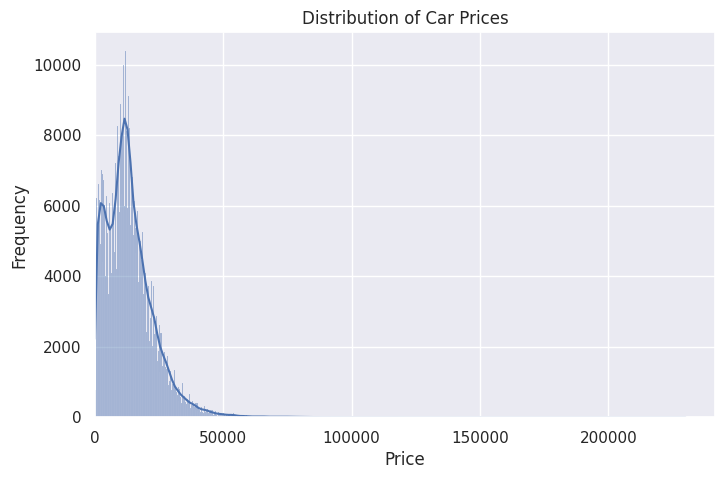

In [127]:
plt.figure(figsize=(8, 5))

sns.histplot(df["Price"], kde=True)

plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Force both axes to start from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()


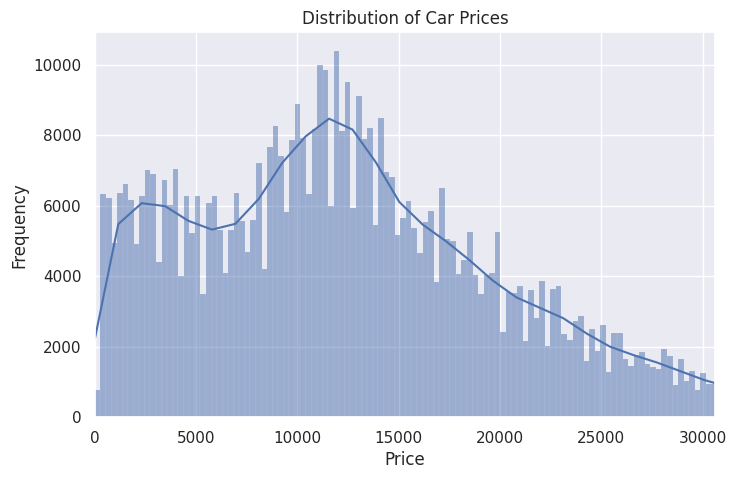

In [133]:
plt.figure(figsize=(8, 5))

sns.histplot(df["Price"], kde=True)

plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Reduce axis range using percentiles for better visibility
plt.xlim(0, df["Price"].quantile(0.95))
plt.ylim(0, None)

plt.show()


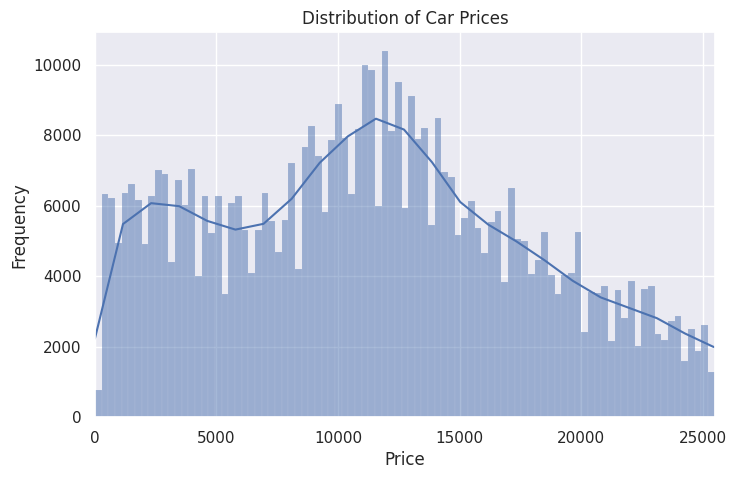

In [134]:
plt.figure(figsize=(8, 5))

sns.histplot(df["Price"], kde=True)

plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Reduce axis range using percentiles for better visibility
plt.xlim(0, df["Price"].quantile(0.90))
plt.ylim(0, None)

plt.show()

## Box Plot (Outlier Detection)

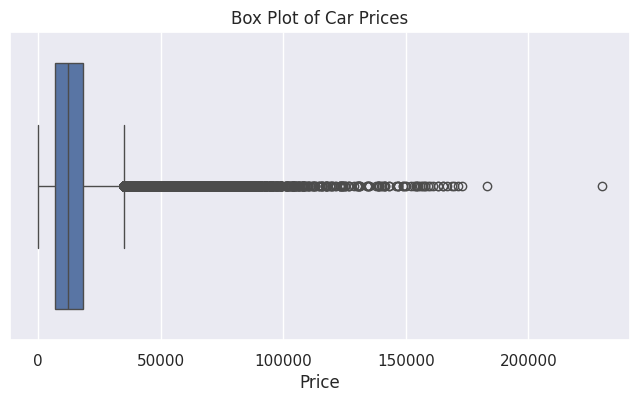

In [130]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Price"])
plt.title("Box Plot of Car Prices")
plt.show()

# Analysis of Key Numerical Features
## Mileage vs Price

Use a Scatter Plot

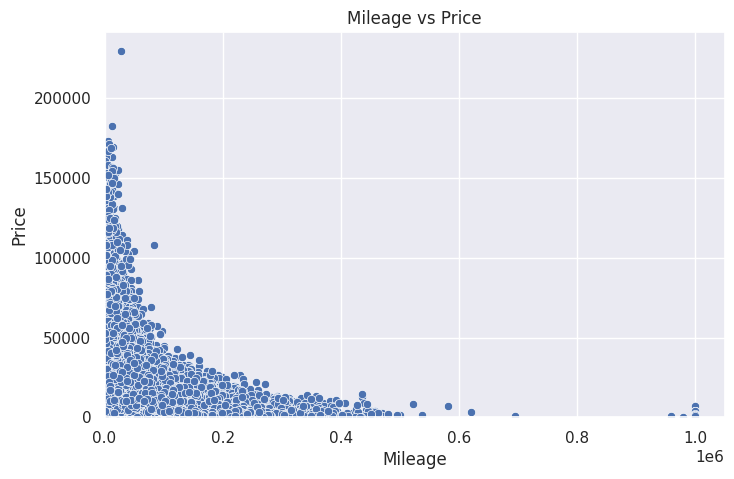

In [138]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Mileage", y="Price", data=df)
plt.title("Mileage vs Price")

# Force both axes to start from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

The dots trend downward from left to right, it means that as mileage increases, price decreases.

This downward trend is what we call a negative relationship.

Using Correlation Coefficient

In [159]:
corr = df["Mileage"].corr(df["Price"])
print("Correlation between mileage and price:", corr)


Correlation between mileage and price: -0.5822666562541722


There is a negative relationship between mileage and price (correlation = -0.58), indicating that cars with higher mileage tend to have lower prices. This is expected due to vehicle depreciation with usage.

## Year vs Price

##Using a Scatter Plot

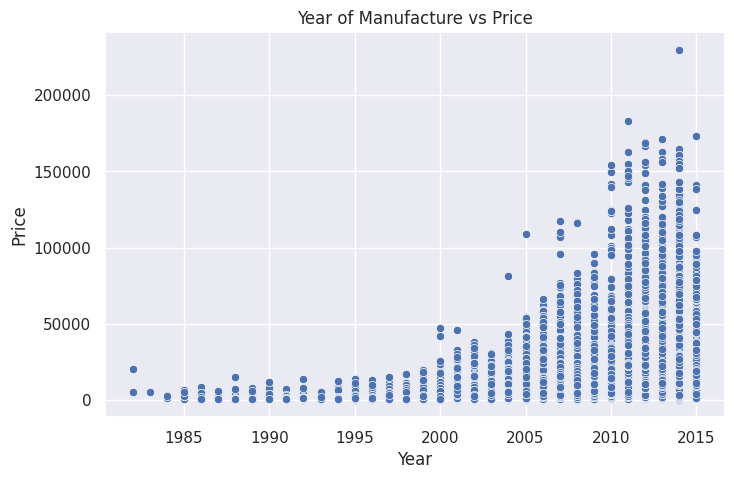

In [153]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Year", y="Price", data=df)
plt.title("Year of Manufacture vs Price")
plt.show()


The points trend upwards as you move from older years (left) to newer years (right), that means newer cars generally cost more.

You notice a “cloud” of points rising diagonally — that’s the visual cue.

##Using Grouped Averages

##calculate the average price per year

In [157]:
avg_price_by_year = df.groupby("Year")["Price"].mean()
print(avg_price_by_year)


Year
1982    12750.000000
1983     5250.000000
1984     2160.000000
1985     3520.000000
1986     2538.636364
1987     1512.500000
1988     3168.181818
1989     1620.000000
1990     1435.714286
1991      943.656716
1992      991.666667
1993      833.902439
1994      870.599490
1995      913.292546
1996      985.781434
1997     1157.454722
1998     1261.719404
1999     1533.696105
2000     1827.834130
2001     2131.014224
2002     2611.709315
2003     3447.268654
2004     4321.474455
2005     4893.989857
2006     6190.204808
2007     8021.969687
2008     9508.054092
2009    10462.313295
2010    12412.453313
2011    15851.677185
2012    16653.660822
2013    17476.164544
2014    20090.003417
2015    25932.117198
Name: Price, dtype: float64


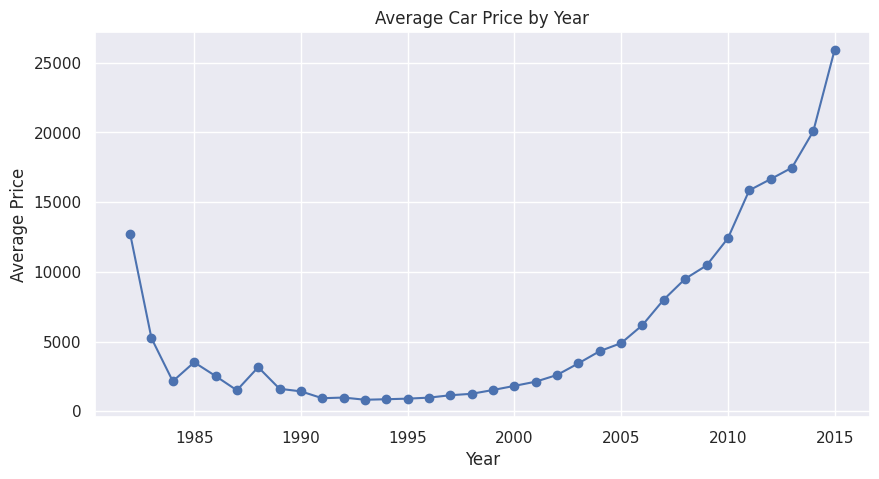

In [155]:
plt.figure(figsize=(10,5))
avg_price_by_year.plot(marker="o")
plt.title("Average Car Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()


##correlation between year and price

In [156]:
correlation = df["Year"].corr(df["Price"])
print("Correlation between Year and Price:", correlation)


Correlation between Year and Price: 0.586474136977815


##KEY INSIGHT OF CAR PRICE AND YEAR

Direction: The correlation is positive. This means as the year of a car increases (i.e., newer models), the price tends to increase too.

Strength: A correlation of ~0.59 is moderate to strong. It’s not perfect, but there’s a clear upward trend.

Implication: In your dataset, newer cars generally cost more, which aligns with common expectations in car pricing.

Caution: Correlation does not imply causation. Other factors like mileage, condition, brand, or features could also affect price.

# Categorical Feature Analysis
## Average Price by Car Brand(Make)

In [161]:
# Average price per car make
avg_price_by_make = df.groupby("Make")["Price"].mean().sort_values(ascending=False)
avg_price_by_make.head(10)


,Price
Make,
Rolls-Royce,153488.235294
Ferrari,127210.526316
Lamborghini,112625.000000
Bentley,74367.672414
airstream,71000.000000
Tesla,67054.347826
Aston Martin,54812.000000
Fisker,46461.111111
Maserati,45320.300752


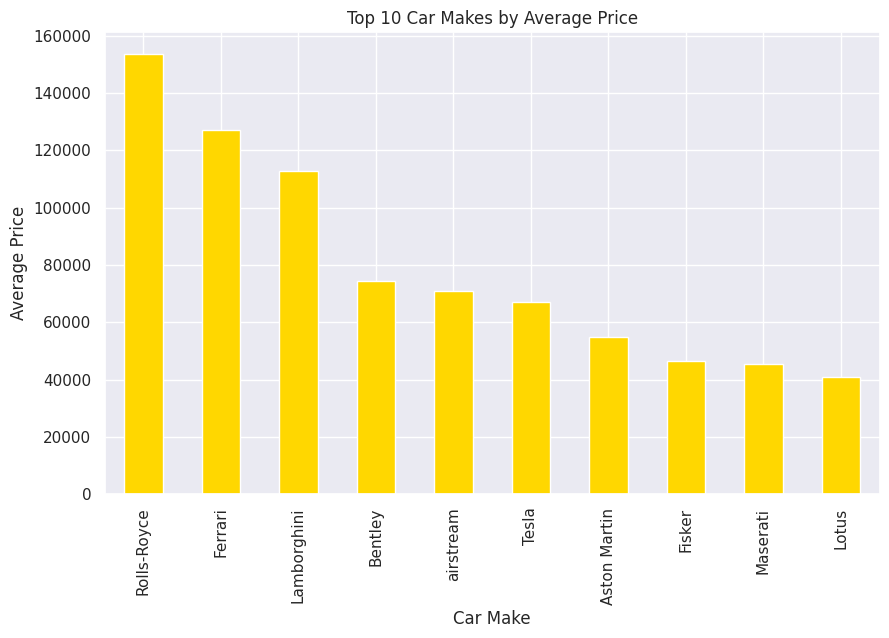

In [162]:
plt.figure(figsize=(10,6))
avg_price_by_make.head(10).plot(kind="bar", color="gold")
plt.title("Top 10 Car Makes by Average Price")
plt.ylabel("Average Price")
plt.xlabel("Car Make")
plt.show()


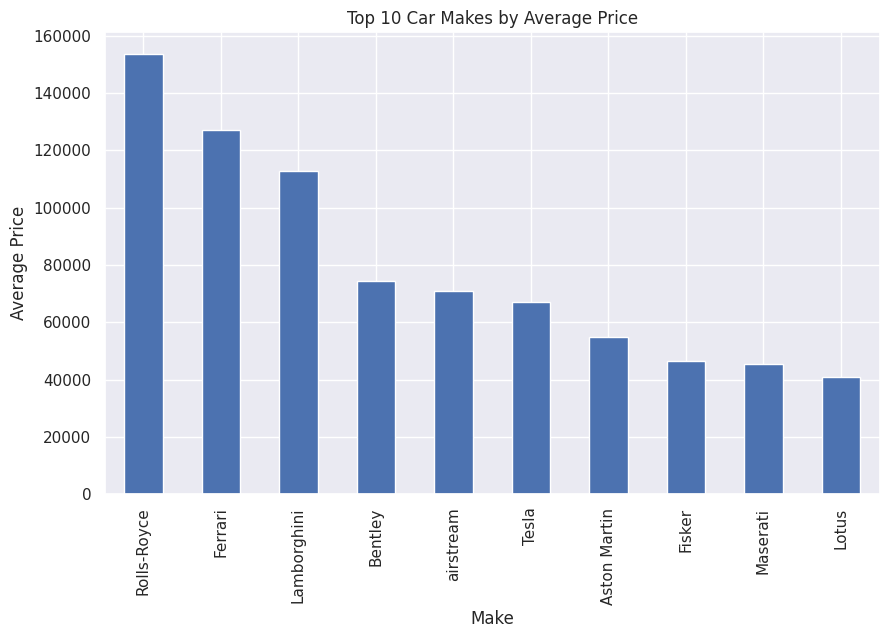

In [144]:
plt.figure(figsize=(10,6))
df.groupby("Make")["Price"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Car Makes by Average Price")
plt.ylabel("Average Price")
plt.show()


##INSIGHT
Luxury brands usually stand out much higher than the rest.

# Automatic cars priced by  Manual cars

#Average Car Price by Transmission Type

In [164]:
#Check if the transmission column exists
df['Transmission'].value_counts()


,count
Transmission,
automatic,541267
manual,17544
sedan,15
Sedan,11


This shows the unique values in your transmission column

In [165]:
#Calculate Average Price by Transmission Type
avg_price_transmission = df.groupby('Transmission')['Price'].mean()
print(avg_price_transmission)


Transmission
Sedan        13686.363636
automatic    13689.110618
manual       11211.448358
sedan        13650.000000
Name: Price, dtype: float64


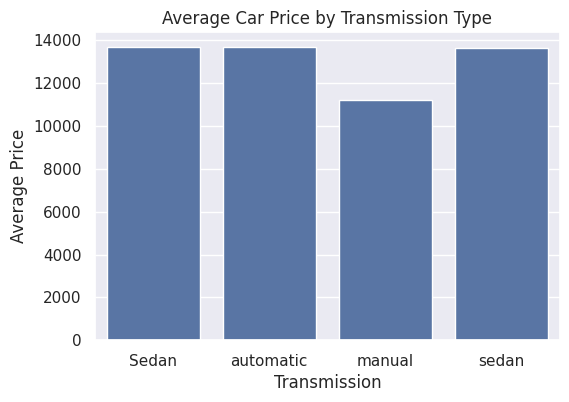

In [166]:
plt.figure(figsize=(6,4))
sns.barplot(x=avg_price_transmission.index, y=avg_price_transmission.values)
plt.title("Average Car Price by Transmission Type")
plt.ylabel("Average Price")
plt.show()


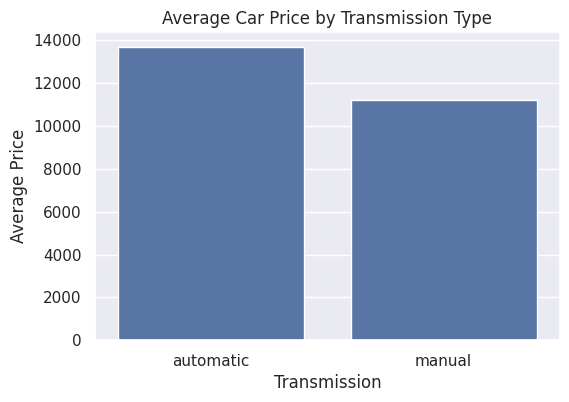

In [167]:
# Filter to include only 'automatic' and 'manual'
filtered_avg_price = avg_price_transmission.loc[['automatic', 'manual']]

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=filtered_avg_price.index, y=filtered_avg_price.values)
plt.title("Average Car Price by Transmission Type")
plt.ylabel("Average Price")
plt.show()


This bar chart shows automatic  cars are expensive on average than manual cars.

#Using the t-test

In [168]:
from scipy.stats import ttest_ind

manual_prices = df[df['Transmission'] == 'manual']['Price']
auto_prices = df[df['Transmission'] == 'automatic']['Price']

t_stat, p_value = ttest_ind(auto_prices, manual_prices, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 31.49809996851995, P-value: 3.406312013934822e-212


Automatic cars are significantly more expensive than manual cars, statistically.
The extremely small p-value confirms this difference is not by chance.

#checking whether car condition influences how mileage affects price

In [170]:
#Check unique values of condition
df["Condition"].value_counts()


,count
Condition,
19.0,42281
35.0,38570
37.0,25938
44.0,25514
43.0,24937
42.0,24328
36.0,23144
41.0,23073
2.0,20790


In [171]:
#Check correlations
df[["Mileage", "Condition", "Price"]].corr()

,Mileage,Condition,Price
Mileage,1.000000,-0.30458,-0.582267
Condition,-0.304580,1.00000,0.313120
Price,-0.582267,0.31312,1.000000


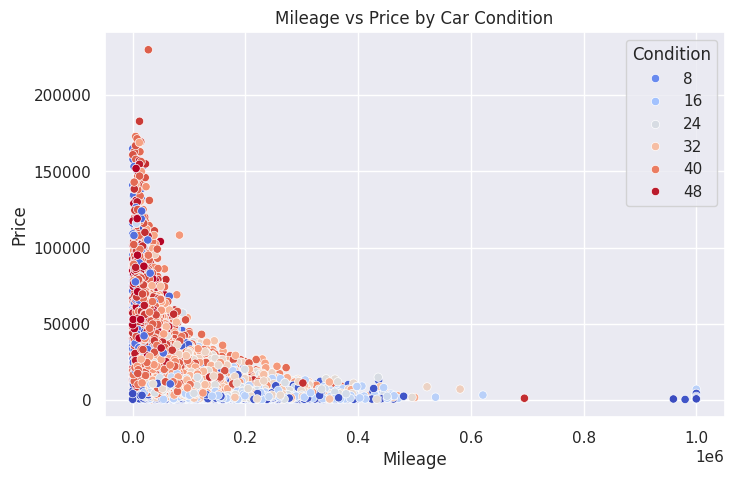

In [172]:
#Visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x="Mileage", y="Price", hue="Condition", data=df, palette="coolwarm")
plt.title("Mileage vs Price by Car Condition")
plt.show()


#Key patterns and insights
1. Strong negative relationship between mileage and price.

As mileage increases, price generally decreases.

Cars with very low mileage can sell for very high prices.

Cars with very high mileage (600k–1,000k) are almost always priced very low.

###This confirms that mileage is a major driver of car price.

2. Car condition clearly matters.
For the same mileage, cars in better condition (higher condition scores) tend to:

Sell at higher prices

Retain value longer

###Poor-condition cars lose value faster, even at low mileage.

Example:

Two cars with ~50,000 mileage:

Condition 48 → much higher price

Condition 8 or 16 → much lower price

###So From the plot:

Mileage lowers price for all cars

But condition softens or worsens that effect:

High-condition cars lose value more slowly

Low-condition cars lose value more rapidly

This implies car condition acts as a mediating (or influencing) factor between mileage and price.

# Correlation Analysis
## Correlation Matrix

In [150]:
corr_matrix = df.select_dtypes(include=np.number).corr()
corr_matrix


,Year,Condition,Mileage,Mmr,Price
Year,1.000000,0.323564,-0.772415,0.596594,0.586474
Condition,0.323564,1.000000,-0.304580,0.273153,0.313120
Mileage,-0.772415,-0.304580,1.000000,-0.587958,-0.582267
Mmr,0.596594,0.273153,-0.587958,1.000000,0.983634
Price,0.586474,0.313120,-0.582267,0.983634,1.000000


MMR stands for “Manheim Market Report” price indicating the estimated wholesale or resale value of a vehicle based on its make, model, year, mileage, and condition.

The mmr column likely represents the expected market price of the car, which can be compared to the listed price to spot bargains or overpricing.

# Correlation Heatmap

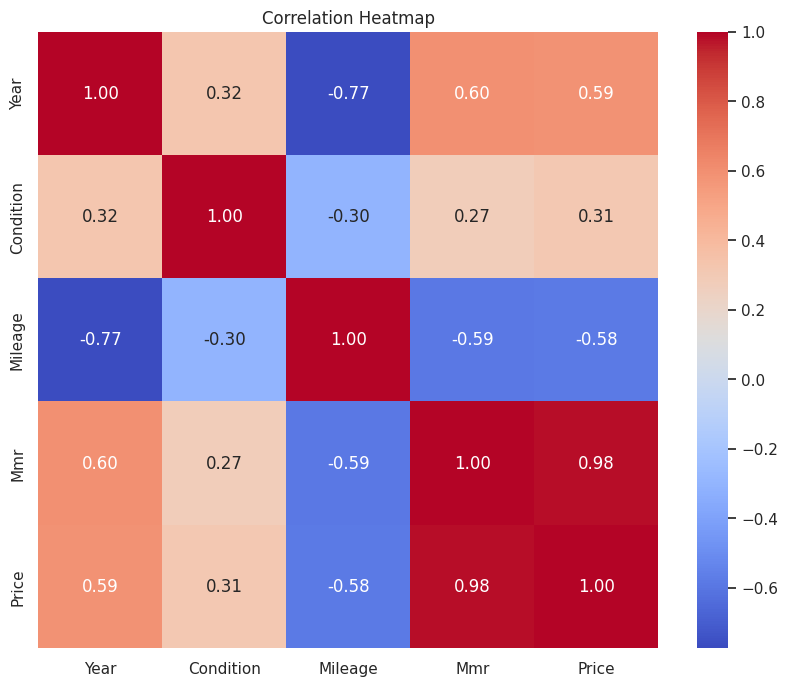

In [151]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Multivariate Analysis
## Pair Plot of Key Numerical Variables

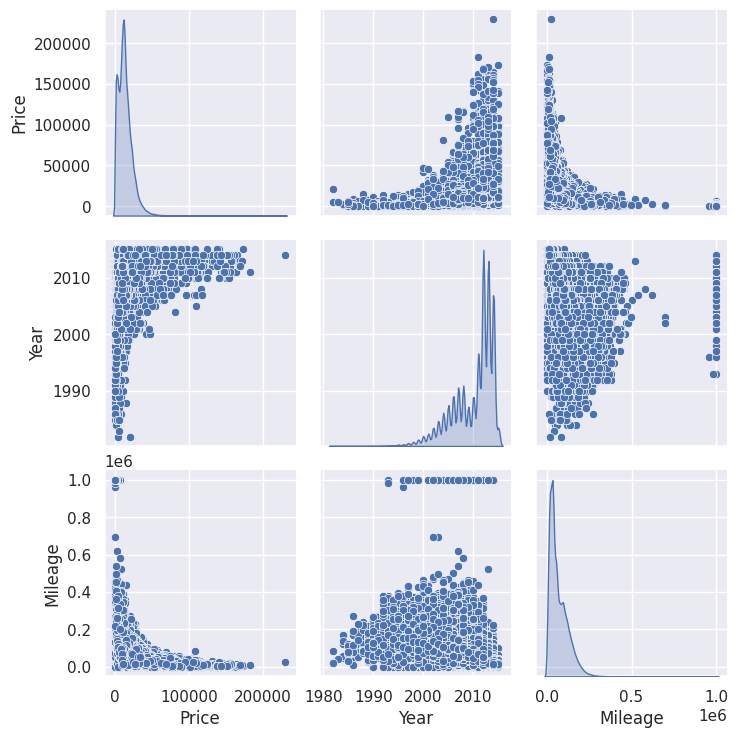

In [152]:
sns.pairplot(
    df[["Price", "Year", "Mileage"]],
    diag_kind="kde"
)
plt.show()


### Key Insights:
- Car prices tend to **increase with newer model years**.
- There is a **negative relationship between mileage and price**, indicating depreciation with usage.
- Luxury and premium car brands show significantly **higher average prices**.
- Some extreme price outliers exist, likely representing rare or high-end vehicles.
- Automatic cars price higher than manual cars.
- Car condition mediate the relationship between mileage and price

### Hypotheses for Further Investigation:

Can car price be accurately predicted using year, mileage, and engine size?


##Determine If Car Price Is Predictable

In [175]:
#Select Features and Target
X = df[["Year", "Mileage"]]
y = df["Price"]


In [176]:
#Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [177]:
#Train a Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [178]:
#Make Predictions
y_pred = model.predict(X_test)


In [179]:
#Evaluate Model Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


MAE: 5261.75
RMSE: 7558.46
R² Score: 0.390


The regression model demonstrates moderate predictive performance. While the average prediction error is approximately 5,262, the higher RMSE indicates the presence of large errors for certain vehicles. An R² score of 0.398 suggests that the model explains about 40% of the variability in car prices, indicating that additional features or more advanced models may be required to improve performance.

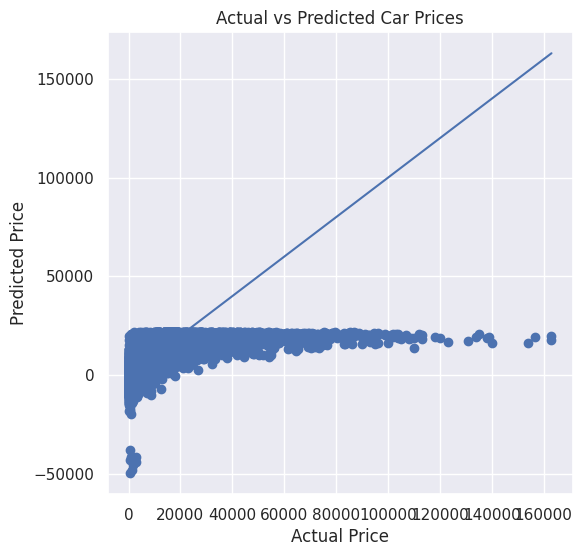

In [180]:
#Visualize Predictions vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

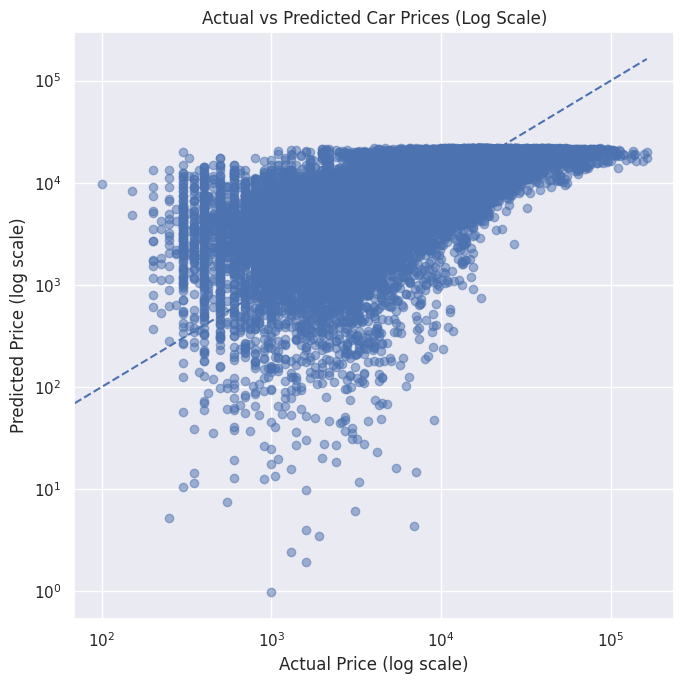

In [183]:
# Visualize Predictions vs Actual (using Log Scale since prices are heavily skewed)

plt.figure(figsize=(7, 7))

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)

# Reference line (perfect prediction)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

# Apply log scale
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Actual Price (log scale)")
plt.ylabel("Predicted Price (log scale)")
plt.title("Actual vs Predicted Car Prices (Log Scale)")

plt.tight_layout()
plt.show()


Car price cannot be accurately predicted using only year and mileage. While these features provide some explanatory power, a significant portion of price variation (~60%) is due to other factors. A more accurate model requires additional features (brand, model, condition, trim, etc.) and possibly non-linear modeling approaches.

### Conclusion:
This exploratory analysis revealed key drivers of car pricing, including vehicle age, mileage, and brand.
The insights derived can inform pricing strategies, consumer decision-making, and predictive modeling
in the automotive resale market.
